In [60]:
import pandas as pd

In [61]:
df = pd.read_excel("UNITweets.xlsx", sheet_name="WorkingCopy")

Checklist: AAVE, Comp, CRV, MKR, SUSHI, UNI

In [62]:
df.head()

,Date,ID,Content,Username
0,6/3/2022,1500617685717385221,$UNI~If you really want to make huge profits o...,Stephan00882188
1,6/3/2022,1500617343340273666,Current price for $UNI = $8.54 24hr price c...,cryptoalerts911
2,6/3/2022,1500613249452195840,#UNIUSDT Bear Alert! 5X Volume Price: 8....,abnormal_crypto
3,6/3/2022,1500611264392798209,Swing ðŸš¥ $DOGE ðŸŸ¡ $0.12 $SHIB ðŸŸ¡ $0.00 ...,quant_coin
4,6/3/2022,1500611036889501701,$gala about to fun hard this next month.... $...,Luna22627436


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91341 entries, 0 to 91340
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      91341 non-null  object
 1   ID        91341 non-null  int64 
 2   Content   91341 non-null  object
 3   Username  91341 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [64]:
# Preparing Text Data for Sentimental Analysis

import numpy as np
import re
from nltk.corpus import stopwords

stop = stopwords.words('english')

def clean_content(contentInput):
    if type(contentInput) == np.float:
        return ""
    contentInput = contentInput.lower()
    contentInput = re.sub("'", "", contentInput) # to avoid removing contractions in english
    contentInput = re.sub("@[A-Za-z0-9_]+","", contentInput)
    contentInput = re.sub("#[A-Za-z0-9_]+","", contentInput)
    contentInput = re.sub(r'http\S+', '', contentInput)
    contentInput = re.sub('[()!?]', ' ', contentInput)
    contentInput = re.sub('\[.*?\]',' ', contentInput)
    contentInput = re.sub("[^a-z0-9]"," ", contentInput)
    contentInput = contentInput.strip()
    contentInput = contentInput.split()
    contentInput = [w for w in contentInput if not w in stop]
    contentInput = " ".join(word for word in contentInput)
    return contentInput



In [65]:
#spliting data into months as for time series sentimental analysis
#Geting start and end date of data
monthList = pd.date_range('2021-09-01','2022-03-07', 
            freq='MS').strftime("%m/%Y").tolist()

#creating blank dict for later

timeSplitData={}
timeSplitDataSentiment = {}

for month in monthList: 
    timeSplitData[month] = []
    timeSplitDataSentiment[month] = []    


In [66]:
for row in df.iterrows():
    #extracting month data from row
    dateData = row[1]['Date']
    tmp = dateData.find('/')
    monthData = dateData[tmp+1:] #removing day e.g '12/'
    if len(monthData) == 6:
        monthData = "0"+monthData
    
    if monthData in timeSplitData: # check if data is in range of date we want to analyse
        content = row[1]['Content']
        #cleaning Data
        cleaned = clean_content(content)
        #Storing into time split dict
        timeSplitData[monthData].append(cleaned)


C:\Users\yanwe\AppData\Local\Temp/ipykernel_16768/2198407358.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(contentInput) == np.float:


In [67]:
timeSplitData

{'09/2021': ['bitcoin lets go octobrrrrrr btc matic eth dot ksm avax sol uni ada xlm',
  'top 3 dao tokens market capitalization according order 1 uni 2 aave 3 makr',
  '2021 09 30 13 00 gmt uni total trading volume 16 009 285uni price change 3 1 last 24 hrs uni',
  'joined ido whitelist get guaranteed ido allocation today tg vlx sol avax btc eth cake uni ada kcc',
  'get board get left behind epic sushi thread xrp xlm algo hbar xdc ada dot link uni',
  'celr got confirmed week celr back top100 celr top gainer day invest fundamentals bear market sir btc eth dot link bnb egld xlm vet rune crv sol xrp ada doge shib matic uni ltc xrp',
  'qnt qnt qnt qnt qnt zec btc eth etc bnb xrp dot doge bch ltc link eos neo vxv drc nii icp luna uni matic trx albt vxv luna sol',
  'eos blockchain interoperability important btc eth ada xrp xdc bnb uni matic xlm zxc lcx albt dag atom dot link',
  'uni uniswapppp spot trade bc',
  'wow muscles fire true fitness app using using app using trending google fo

In [2]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yanwe\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
## VADER testing and understanding

testText = "more profits earned crypto discord group join here   $DOGE $BTC $ETH $BCH $EOS $XRP $TRX $CF $SRM $LTC $DOT $ETC $CRV $TP $BNB $SL $LINK $SUSHI $ATH $LOL https://t.co/pZ4srjSo58"
negativeTest = sid.polarity_scores(testText)

testText = "market doing well go up"
positiveTest = sid.polarity_scores(testText)
## compound can be use to net the sentiment.. negative mean bear

print(negativeTest)
print(positiveTest)

{'neg': 0.079, 'neu': 0.763, 'pos': 0.158, 'compound': 0.4005}
{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.2732}


In [70]:
## Geting Sentiment Score using VANDER's sentiment model
for month in timeSplitData:
    for content in timeSplitData[month]:
        output = sid.polarity_scores(content)
        timeSplitDataSentiment[month].append(output)


In [71]:
## Calculating Net Weighted Sentiment Score
timeSplitDataNetScore = {}
for month in monthList:
    timeSplitDataNetScore[month] = 0 
    
for month in timeSplitDataSentiment:
    for output in timeSplitDataSentiment[month]:
        compound = output['compound']
        compound = compound / len(timeSplitDataSentiment[month])
        timeSplitDataNetScore[month] +=compound


In [72]:
timeSplitDataNetScore

{'09/2021': 0.15094816308243733,
 '10/2021': 0.16546679169944295,
 '11/2021': 0.1564118791946311,
 '12/2021': 0.1511172472722498,
 '01/2022': 0.1674955321852123,
 '02/2022': 0.1749001034340084,
 '03/2022': 0.18530478299379974}

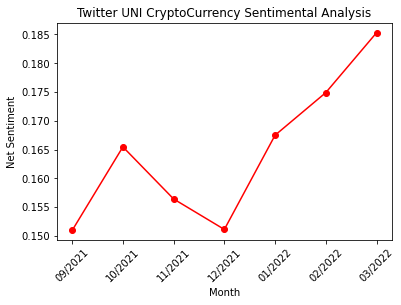

In [73]:
import matplotlib.pyplot as plt

xAxis = []
yAxis = []

for date in timeSplitDataNetScore:
    xAxis.append(date)
    yAxis.append(timeSplitDataNetScore[date])

plt.plot(xAxis,yAxis, color='red', marker='o')
plt.title('Twitter UNI CryptoCurrency Sentimental Analysis')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Net Sentiment')
# plt.grid(True)
plt.show()